## Observed and expected frequencies

In this lesson, we'll learn about the chi-squared test for categorical data. This test allows us to find the statistical significance of observing a set of **categorical values**.

We'll work with data on U.S. income and demographics throughout this mission. Here are the first few rows of the data, in csv format:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

income = pd.read_csv('income.csv')

income.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Each row represents a single person who was counted in the 1990 US Census and contains information about their income and demographics. Here are some of the relevant columns:

- Age - person's age
- Workclass - person's field of employment
- Race - person's race
- Sex - person's gender, either Male or Female

The entire dataset has 32561 rows, and is a sample of the full census. Of the rows, 10771 are Female, and 21790 are Male. These numbers may seem incorrect, because the full census shows that the U.S. is about 50% Male and 50% Female. Therefore, our expected values for number of Males and Females would be 16280.5 each.

Here's a diagram:

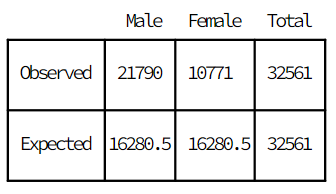

We know that the numbers may seem incorrect, but we don't quite know how to find the numerical value for the observed and expected values. We also can't determine if there's a statistically significant difference between the two groups, and if we need to examine further.

This is where a chi-squared test can help. The chi-squared test enables us to quantify the difference between sets of observed and expected categorical values.

### Calculating differences

One way that we can determine the differences between observed and expected values is to compute simple proportional differences.

For example, an expected value is 1000, and the observed value is 1100. We can compute the proportional difference with:

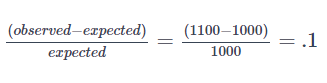

There's a .1, or 10%, difference between our observed and expected values.

In [14]:
observed_male = (income['sex'] == ' Male').sum()
expected_male = income.shape[0] / 2

observed_female = (income['sex'] == ' Female').sum()
expected_female = income.shape[0] / 2

male_diff = (observed_male - expected_male) / expected_male

female_diff = (observed_female - expected_female) / expected_female

male_diff, female_diff

(0.33841098246368356, -0.33841098246368356)

### Updating formula

On the last screen, we got -0.338 for the Female difference, and 0.338 for the Male difference. These are great for finding individual differences for each category, but since both values add up to 0, they don't give us an accurate measure of how our overall observed counts deviate from the expected counts.

You may recall this diagram from earlier:

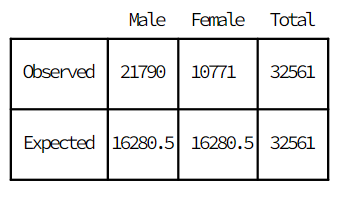

No matter what numbers you type in for observed Male or Female counts, the differences between observed and expected will always add to 0, because the total observed count for Male and Female items always comes out to 32561. If the observed count of Females is high, the count of Males has to be low to compensate, and vice versa.

**What we really want to find is one number that can tell us how much all of our observed counts deviate from all of their expected counterparts**. This help us figure out if our difference in counts is statistically significant. We can get one step closer to this by squaring the top term in our difference formula:

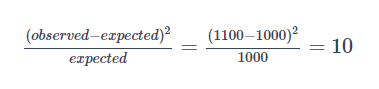

Squaring the difference will ensure that all the differences don't equal to zero (you can't have negative squares), giving us a number higher than zero we can use to assess statistical significance.

We can calculate $χ^2$, the chi-squared value, by adding the squared differences between observed and expected values.

In [15]:
male_diff = (observed_male - expected_male)**2 / expected_male

female_diff = (observed_female - expected_female)**2  / expected_female

gender_chisq = male_diff + female_diff

gender_chisq

3728.950615767329

### Generating a distribution

Now that we have a chi-squared value for our observed and expected gender counts, we need a way to figure out what the chi-squared value represents. **We can translate a chi-squared value into a statistical significance value using a chi-squared sampling distribution**. If you recall, we covered statistical significance and p-values in the last mission. A p-value allows us to determine whether the difference between two values is due to chance, or due to an underlying difference.

We can generate a chi-squared sampling distribution using our expected probabilities. If we repeatedly generate random samples that contain 32561 samples, and graph the chi-squared value of each sample, we'll be able to generate a distribution. Here's a rough algorithm:

- Randomly generate 32561 numbers that range from 0-1.
- Based on the expected probabilities, assign Male or Female to each number.
- Compute the observed frequencies of Male and Female.
- Compute the chi-squared value and save it.
- Repeat several times.
- Create a histogram of all the chi-squared values.

By comparing our chi-squared value to the distribution and seeing what percentage of the distribution is greater than our value, we'll get a p-value. For instance, if 5% of the values in the distribution are greater than our chi-squared value, the p-value is .05.

### Exercise

(array([737., 162.,  56.,  24.,   8.,   4.,   5.,   2.,   1.,   1.]),
 array([3.07115875e-05, 1.36635238e+00, 2.73267406e+00, 4.09899573e+00,
        5.46531740e+00, 6.83163908e+00, 8.19796075e+00, 9.56428242e+00,
        1.09306041e+01, 1.22969258e+01, 1.36632474e+01]),
 <BarContainer object of 10 artists>)

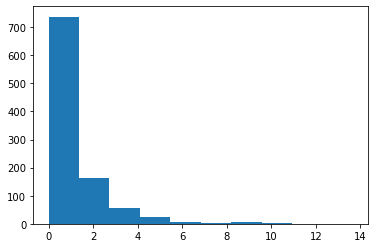

In [21]:
chi_squared_values = []

for i in range(1000):
    ran_numbers = np.random.random(32561)

    male_female = 1 * (ran_numbers >= 0.5)

    # Number of males
    male_frequency = male_female.sum()
    # Number of females
    female_frequency = len(male_female) - male_frequency

    # differences
    male_diff = (male_frequency - len(male_female) * 0.5)**2 / (len(male_female) * 0.5)
    female_diff = (female_frequency - len(male_female) * 0.5)**2 / (len(male_female) * 0.5)

    chi_squared_values.append(male_diff + female_diff)
    
plt.hist(chi_squared_values)

## Statistical significance

On the last screen, our calculated chi-squared value is greater than all the values in the distribution, so **our p-value is 0**, indicating that our result is statistically significant. You may recall from the last mission that .05 is the typical threshold for statistical significance, and anything below it is considered significant.

**A significant value indicates that there's a difference between the observed and expected values, but it doesn't indicate what is different.**

Now that we have a chi-squared sampling distribution, we can compare the chi-squared value we calculated for our data to it to see if our result is statistically significant. The chi-squared value we calculated was 3728.95. The highest value in the chi-squared sampling distribution was about 12. This means that our chi-squared value is higher than 100% of all the values in the sampling distribution, so we get a p-value of 0. This means that there is a 0% chance that we could get such a result randomly.

This would indicate that we need to investigate our data collection techniques more closely to figure out **why this result occurred.**

Because a chi-squared value has no sign (all chi-squared values are positive), it doesn't tell us anything about the direction of the statistical significance. If we had 10771 Females, and 21790 Males, or 10771 Males, and 21790 Females, we'd get the same chi-squared value. It's important to look at the data and see how the data is unbalanced after calculating a chi-squared value and getting a significant result.

### Smaller samples

One interesting thing about chi-squared values is that they get smaller as the sample size decreases. For example, with our Male and Female example, let's say we only have 100 rows, but the same observed and expected proportions:


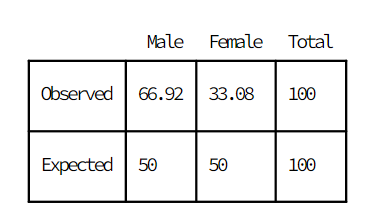

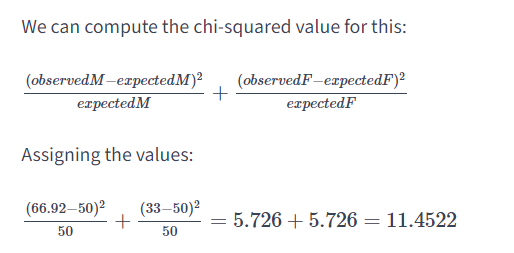

32561 (our original number of rows) divided by 100 (our new number of rows) is 325.61. If we multiply 11.4522 by 325.61, we get 3728.95, which is the exact same chi-squared value that we got two screens ago.

**So as sample size changes, the chi-squared value changes proportionally.**

## Sampling distribution equality

As sample sizes get larger, seeing large deviations from the expected probabilities gets less and less likely. For example, if you're flipping a coin 10 times, you wouldn't be surprised to see this:

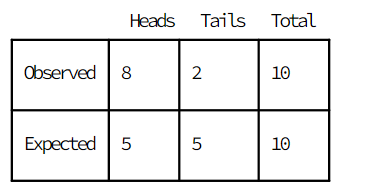

This is a fairly unbalanced result, but in a small sample size, random chance can create effects like this. It would be very surprising to see this after flipping a coin 1000 times, though:

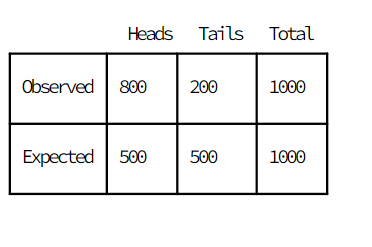

A result like this would probably make you check the coin to see if it's a trick coin or weighted improperly.

The chi-squared value follows the same principle. **Chi-squared values increase as sample size increases, but the chance of getting a high chi-squared value decreases as the sample gets larger.**

These two effects offset each other. A chi-squared sampling distribution constructed when sampling 200 items per iteration will look identical to one sampling 1000 items.

This allows us to easily compare any chi-squared value to a master sampling distribution to determine statistical significance, no matter what sample size the chi-squared value was created with.

#### Exercise

(array([694., 164.,  54.,  42.,  16.,   5.,  14.,   5.,   1.,   5.]),
 array([0.   , 0.972, 1.944, 2.916, 3.888, 4.86 , 5.832, 6.804, 7.776,
        8.748, 9.72 ]),
 <BarContainer object of 10 artists>)

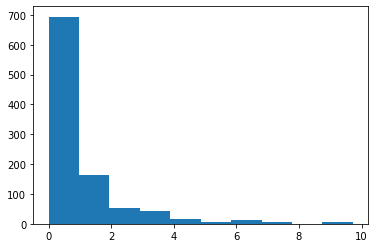

In [23]:
chi_squared_values = []

for i in range(1000):
    ran_num = np.random.random(300)
    
    male_female = 1 * (ran_num >= 0.5)

    # Number of females
    female_frequency = male_female.sum()
    # Number of males
    male_frequency = len(male_female) - female_frequency

    # differences
    male_diff = (male_frequency - len(male_female) * 0.5)**2 / (len(male_female) * 0.5)
    female_diff = (female_frequency - len(male_female) * 0.5)**2 / (len(male_female) * 0.5)

    chi_squared_values.append(male_diff + female_diff)
    
plt.hist(chi_squared_values)

### Degrees of freedom

When we were computing the chi-squared value earlier, we were working with 2 values that could vary, the number of Males and the number of Females. Only 1 of the values could vary. Since we already know the total number of values, 32561, if we set one of the values, the other has to be the difference between 32561 and the value we set.

The diagram from earlier might clarify this:

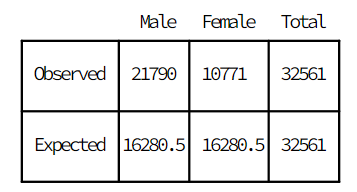

If we set a count for Male or Female, we know what the other value has to be, because they both need to add up to 32561.

**A degree of freedom is the number of values that can vary without the other values being "locked in"**. In the case of our two categories, there is actually only one degree of freedom. Degrees of freedom are an important statistical concept that will come up repeatedly, both in this mission and after.

## Increasing degrees of freedom

So far, we've only calculated chi-squared values for 2 categories and 1 degree of freedom. **We can actually work with any number of categories, and any number of degrees of freedom**. We can accomplish this using largely the same formula we've been using, but we will need to generate new sampling distributions for each number of degrees of freedom.

If we look at the `race` column of the income data, the possible values are White, Black, Asian-Pac-Islander, Amer-Indian-Eskimo, and Other.

We can get our expected proportions straight from the full 1990 US Census:

- White -- 80.3%
- Black -- 12.1%
- Asian-Pac-Islander -- 2.9%
- Amer-Indian-Eskimo -- .8%
- Other -- 3.9%

Here's a table showing expected and actual values for our income dataset:

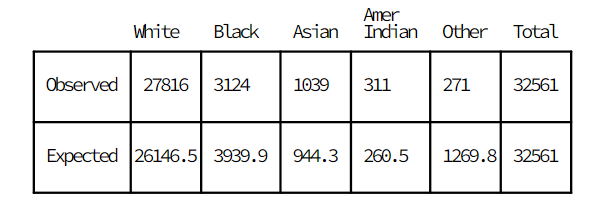

It looks like there's an error between the White and Other counts, but let's research further and calculate the chi-squared value.

### Exercise

- For each category (White, Black, Asian-Pac-Islander, Amer-Indian-Eskimo, and Other):
    - compute the difference between the expected and observed counts,
    - square the difference,
    - divide by the expected value,
    - append each result to a list, and
    - sum the values in the list and assign the result to race_chisq.

In [34]:
expec_dic = {' White': 26146.5, ' Black': 3939.9, ' Asian-Pac-Islander': 944.3, ' Amer-Indian-Eskimo': 260.5, ' Other': 1269.8}

differences = []

for cat in [' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other']:
    observed = (income['race'] == cat).sum()
    expected = expec_dic[cat]
    differences.append((observed - expected)**2 / expected)

race_chisq = sum(differences)
race_chisq

1080.485936593381

### Using SciPy

Rather than constructing another chi-squared sampling distribution for 2 degrees of freedom, we can use a function from the SciPy library to do it more quickly.

The  `scipy.stats.chisquare` function takes in an array of observed frequencies, and an array of expected frequencies, and **returns a tuple** containing both the **chi-squared value** and the **matching p-value** that we can use to check for statistical significance.

Here's a usage example:

In [36]:
from scipy.stats import chisquare

observed = np.array([5, 10, 15])
expected = np.array([7, 11, 12])
chisquare_value, pvalue = chisquare(observed, expected)

chisquare_value, pvalue

(1.4123376623376624, 0.4935313821395443)

The `scipy.stats.chisquare` function returns a list, so we can assign each item in the list to a separate variable using 2 variable names separated with a comma, like you see above.

#### Exercise

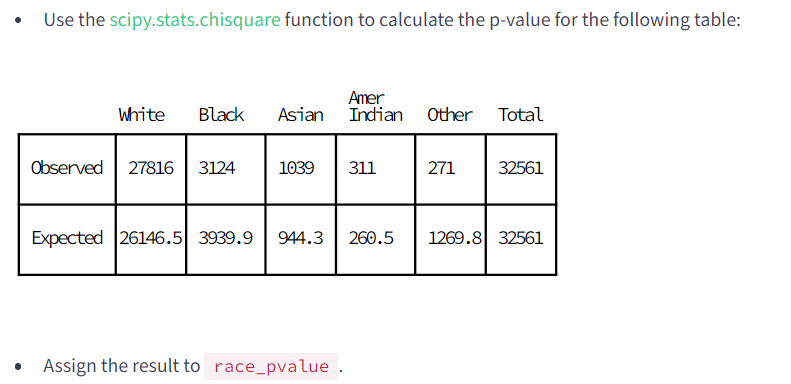

In [38]:
from scipy.stats import chisquare

observed = np.array([27816, 3124, 1039, 311, 271])
expected = np.array([26146.5, 3939.9, 944.3, 260.5, 1269.8])
chisquare_value, race_pvalue = chisquare(observed, expected)

chisquare_value, race_pvalue

(1080.485936593381, 1.2848494674873035e-232)